In [7]:
# 训练
!python train_generator.py

Using Theano backend.
Using cuDNN version 7004 on context None
Mapped name None to device cuda: GeForce GTX 1080 (0000:02:00.0)
Loading and preprocessing and standarize train data...
Loading train data from /home/mh/ult_nerve_seg/np_data/imgs_train.npy and /home/mh/ult_nerve_seg/np_data/imgs_mask_train.npy
Shuffle & split...
Creating and compiling and fitting model...
Training Shape: (4508, 1, 160, 224)
Epoch 1/150
187/187 [==============================] - 146s - loss: 0.2939 - main_output_loss: -0.0566 - aux_output_loss: 0.7009 - main_output_dice_coef: 0.0566 - aux_output_acc: 0.5544 - val_loss: 0.3154 - val_main_output_loss: -0.0326 - val_aux_output_loss: 0.6961 - val_main_output_dice_coef: 0.0326 - val_aux_output_acc: 0.6087
Epoch 2/150
187/187 [==============================] - 146s - loss: 0.1924 - main_output_loss: -0.1534 - aux_output_loss: 0.6915 - main_output_dice_coef: 0.1534 - aux_output_acc: 0.5660 - val_loss: 0.1473 - val_main_output_loss: -0.1955 - val_aux_output_loss: 0

187/187 [==============================] - 146s - loss: -0.2383 - main_output_loss: -0.5143 - aux_output_loss: 0.5520 - main_output_dice_coef: 0.5143 - aux_output_acc: 0.7103 - val_loss: 0.4137 - val_main_output_loss: -0.1600 - val_aux_output_loss: 1.1475 - val_main_output_dice_coef: 0.1600 - val_aux_output_acc: 0.5723
Epoch 43/150
187/187 [==============================] - 146s - loss: -0.2290 - main_output_loss: -0.5078 - aux_output_loss: 0.5577 - main_output_dice_coef: 0.5078 - aux_output_acc: 0.7030 - val_loss: 0.1717 - val_main_output_loss: -0.2186 - val_aux_output_loss: 0.7807 - val_main_output_dice_coef: 0.2186 - val_aux_output_acc: 0.5821
Epoch 44/150
187/187 [==============================] - 146s - loss: -0.2447 - main_output_loss: -0.5204 - aux_output_loss: 0.5514 - main_output_dice_coef: 0.5204 - aux_output_acc: 0.7128 - val_loss: 0.2921 - val_main_output_loss: -0.1845 - val_aux_output_loss: 0.9531 - val_main_output_dice_coef: 0.1845 - val_aux_output_acc: 0.5812
Epoch 45/15

In [2]:
# 测试（预测）
import cv2
import os
import numpy as np
from PIL import Image
from data import load_train_data, load_test_data, load_patient_num
img_pred_path = '/home/mh/ult_nerve_seg/res/test_1/imgs_mask_test.npy' # train_generator.py有两个numpy输出的prediction过程
img_pred_exist_path = '/home/mh/ult_nerve_seg/res/test_1/imgs_mask_exist_test.npy' # train_generator.py有两个numpy输出的prediction过程
out_path = '/home/mh/ult_nerve_seg/res/predict'
img_test_path = '/home/mh/ult_nerve_seg/np_data/test'

img_pred_npy = load_test_data(img_pred_path)
img_pred_exist_npy = load_test_data(img_pred_exist_path)
for i in range(img_pred_npy.shape[0]):
    img_tf = np.transpose(img_pred_npy[i], (1,2,0)) # channel_last 切换
    # img = Image.fromarray(img_tf).astype('uint8')
    cv2.imwrite(os.path.join(out_path, 'img_{}_mask.tif').format(i), img_tf)
# sigmoid 概率
print('5508张test超声图的2分类预测结果：{}'.format(img_pred_exist_npy))
print('维度：{}'.format(img_pred_exist_npy.shape))

Loading test data from /home/mh/ult_nerve_seg/res/test_1/imgs_mask_test.npy
Loading test data from /home/mh/ult_nerve_seg/res/test_1/imgs_mask_exist_test.npy
5508张test超声图的2分类预测结果：[[0.49384725]
 [0.5230635 ]
 [0.48922956]
 ...
 [0.51941615]
 [0.48436773]
 [0.3172258 ]]
维度：(5508, 1)


随机1张test超声图的原图示例(160, 224, 1)：
153


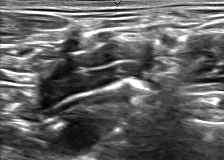

In [34]:
# test中随机一张超声图
import random
img_num = random.randint(1, img_pred_npy.shape[0])
print('随机1张test超声图的原图示例(160, 224, 1)：')
print(img_num)
img_origin = cv2.imread(os.path.join(img_test_path, '{}.tif').format(img_num), cv2.IMREAD_GRAYSCALE)
img_origin = cv2.resize(img_origin, (224, 160), interpolation=cv2.INTER_CUBIC) # 原图（580，420）做了（224，160）的resize
img_origin = Image.fromarray(img_origin)
img_origin

# import SimpleITK as sitk # 3D imread
# itk_img = sitk.ReadImage(os.path.join(out_path, 'img_{}_mask.tif').format(img_num-1))
# img_array = sitk.GetArrayFromImage(itk_img)
# plt.imshow(img_array)
# plt.axis('off')
# plt.show

随机1张test超声图的对应mask预测示例(160, 224, 1)：
<PIL.TiffImagePlugin.TiffImageFile image mode=F size=224x160 at 0x7F062312BD68>


<function matplotlib.pyplot.show(*args, **kw)>

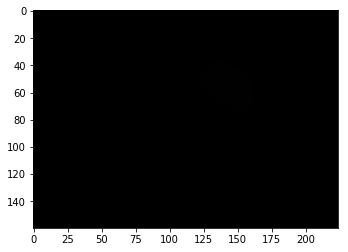

In [28]:
# test中随机一张超声图对应的Mask Prediction（掩模预测结果）
import matplotlib.pyplot as plt
print('随机1张test超声图的对应mask预测示例(160, 224, 1)：')
img_mask= Image.open(os.path.join(out_path, 'img_{}_mask.tif').format(img_num-1))
print(img_mask)
plt.imshow(img_mask)
plt.show
# 四通道的tif格式mask掩模图片，plt.show全黑(不清楚原因)，具体mask_prediction见/home/mh/ult_nerve_seg/res/predict

<function matplotlib.pyplot.show(*args, **kw)>

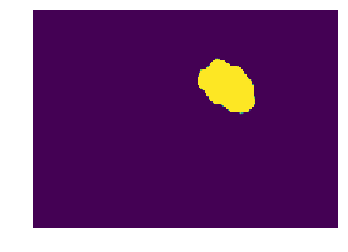

In [29]:
# test中随机一张超声图对应的Mask Prediction（用sitk库来显示）
import SimpleITK as sitk # 3D imread
itk_img = sitk.ReadImage(os.path.join(out_path, 'img_{}_mask.tif').format(img_num-1))
img_array = sitk.GetArrayFromImage(itk_img)
plt.imshow(img_array)
plt.axis('off')
plt.show

Loading test data from /home/mh/ult_nerve_seg/np_data/testImages.npy
Loading test data from /home/mh/ult_nerve_seg/np_data/testMasks.npy
Loading test data from /home/mh/ult_nerve_seg/res/imgs_mask_test.npy
随机第65张图的原始图像、mask标注，以及预测的标注：


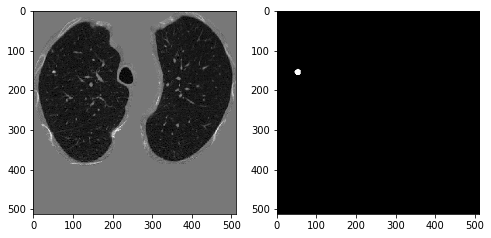

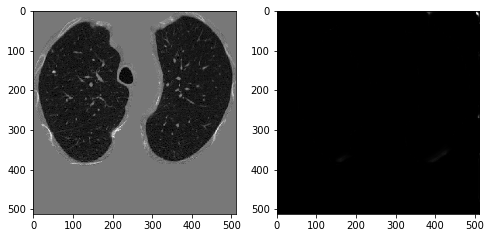

In [100]:
# 李丹肺结节数据，测试结果可视化
img_path = '/home/mh/ult_nerve_seg/np_data/testImages.npy'
img_mask_path = '/home/mh/ult_nerve_seg/np_data/testMasks.npy'
img_mask_pred_path = '/home/mh/ult_nerve_seg/res/imgs_mask_test.npy'

img_npy = load_test_data(img_path) # (None,1,512,512)
img_mask_npy = load_test_data(img_mask_path) # (None,1,512,512)
img_mask_pred_npy = load_test_data(img_mask_pred_path) # (None,1,256,256)

rand_num = random.randint(0, img_npy.shape[0]-1)
print("随机第{}张图的原始图像、mask标注，以及预测的标注：".format(rand_num))
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,8))
ax1.imshow(img_npy[rand_num,0,:,:],cmap='gray')
ax2.imshow(img_mask_npy[rand_num,0,:,:],cmap='gray')
plt.show()
# 原图和预测mask
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,8))
ax1.imshow(img_npy[rand_num,0,:,:],cmap='gray')
ax2.imshow(np.resize(img_mask_pred_npy[rand_num,0,:,:], [512,512]) ,cmap='gray')
plt.show()